<a href="https://colab.research.google.com/github/aadarsh0404/pcb_components_detection/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14691, done.
remote: Total 14691 (delta 0), reused 0 (delta 0), pack-reused 14691
Receiving objects: 100% (14691/14691), 13.25 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (10000/10000), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [31]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14238180220216118598, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14638920512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5732712406665100387
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-02-10 07:40:24--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  2.12MB/s    in 6m 1s   

2021-02-10 07:46:25 (670 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [51]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

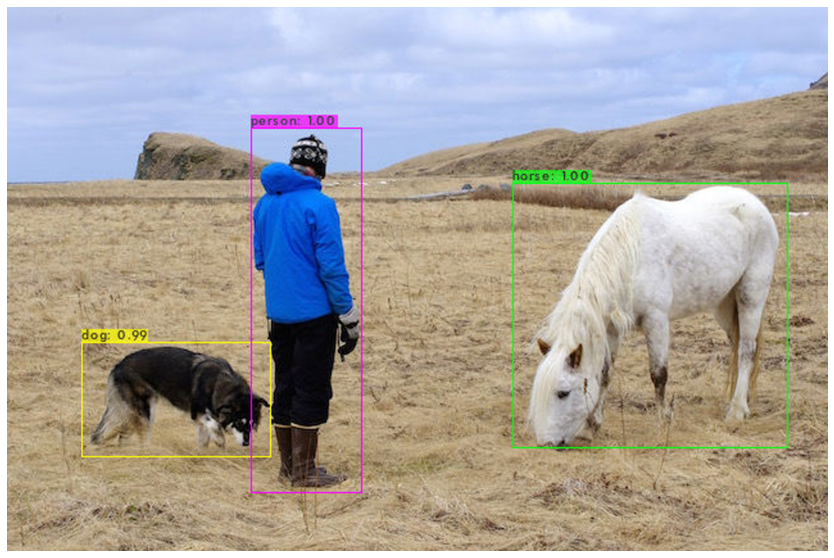

In [ ]:
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

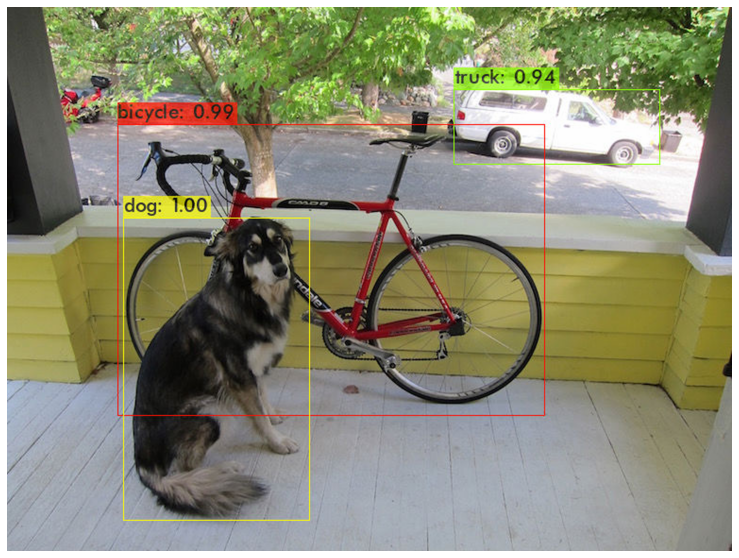

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
assert False

AssertionError: ignored

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New section

In [33]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 AadarshResume.docx
 Aadarsh_Shekhar_resume.gdoc
 Algorithms
 analysis.gsheet
 Annexure1.gdoc
'APPLICATION FOR AUTHORIZATION BY STUDENTS.gdoc'
'Colab Notebooks'
'Communication Eng (10).gslides'
'Communication Eng (1).gslides'
'Communication Eng (2).gslides'
'Communication Eng (3).gslides'
'Communication Eng (4).gslides'
'Communication Eng (5).gslides'
'Communication Eng (6).gslides'
'Communication Eng (7).gslides'
'Communication Eng (8).gslides'
'Communication Eng (9).gslides'
'Communication Eng.gslides'
'Contact Information.gform'
'Copy of Deloitte_Preference sheet_PESIT Bangalore (1).gsheet'
'Copy of Deloitte_Preference sheet_PESIT Bangalore.gsheet'
 darknet.zip
 DemoContent.gdoc
 ECE.gsheet
'Green Taxi.twbx'
 Instructions_to_Hostelites.gdoc
'My Drive'
'Operating system'
 Pesit_students_shortlist.gsheet
'PPT_video (1).pptx'
 PPT_video.mp4
 PPT_video.pptx
 Presentation.gslides
 PS4
'READ ME FIRST !!!!.gdoc'
'Resume (1).gdoc'
'resume (1).pdf'
'Resume (2).gdoc'
'Resume (3).gdoc'
 Resume

In [ ]:
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
replace data/obj/0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/obj/0000.jpg       
  inflating: data/obj/0000.txt       
  inflating: data/obj/0001.jpg       
  inflating: data/obj/0001.txt       
  inflating: data/obj/0002.jpg       
  inflating: data/obj/0002.txt       
  inflating: data/obj/0003.jpg       
  inflating: data/obj/0003.txt       
  inflating: data/obj/0004.jpg       
  inflating: data/obj/0004.txt       
  inflating: data/obj/0005.jpg       
  inflating: data/obj/0005.txt       
  inflating: data/obj/0006.jpg       
  inflating: data/obj/0006.txt       
  inflating: data/obj/0007.jpg       
  inflating: data/obj/0007.txt       
  inflating: data/obj/0010.jpg       
  inflating: data/obj/0010.txt       
  inflating: data/obj/1541II-PCB-Top.jpg  
  inflating: data/obj/1541II-PCB-Top.txt  
  inflating: data/obj/8b6f455d11089ced571afd6e74730887.jpg  
  inflating: data/obj/8b6f455d11089ced571afd6e74730887.txt  
  inflating: data/ob

In [ ]:
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [ ]:
download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /mydrive/yolov3/yolov3_custom2.cfg ./cfg

In [ ]:
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
!python generate_train.py

In [ ]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-02-10 09:07:50--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  96.4KB/s    in 15m 2s  

2021-02-10 09:22:52 (176 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.731354), count: 3, class_loss = 0.079787, iou_loss = 0.228268, total_loss = 0.308055 
 total_bbox = 673170, rewritten_bbox = 0.023768 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.795292), count: 1, class_loss = 0.001328, iou_loss = 0.015846, total_loss = 0.017174 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.837269), count: 4, class_loss = 0.579109, iou_loss = 0.110978, total_loss = 0.690087 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000808, iou_loss = 0.000000, total_loss = 0.000808 
 total_bbox = 673175, rewritten_bbox = 0.023768 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.898275), count: 1, class_loss = 0.003743, iou_loss = 0.008920, total_loss = 0.012663 
v3 (m

In [ ]:
!zip -r /content/darknet.zip /content/darknet

  adding: content/darknet/ (stored 0%)
  adding: content/darknet/chart_yolov3_custom2.png (deflated 28%)
  adding: content/darknet/darknet_video.py (deflated 69%)
  adding: content/darknet/.circleci/ (stored 0%)
  adding: content/darknet/.circleci/config.yml (deflated 72%)
  adding: content/darknet/src/ (stored 0%)
  adding: content/darknet/src/avgpool_layer_kernels.cu (deflated 69%)
  adding: content/darknet/src/image_opencv.cpp (deflated 79%)
  adding: content/darknet/src/coco.c (deflated 71%)
  adding: content/darknet/src/list.h (deflated 56%)
  adding: content/darknet/src/lstm_layer.h (deflated 63%)
  adding: content/darknet/src/deconvolutional_layer.c (deflated 76%)
  adding: content/darknet/src/detection_layer.h (deflated 64%)
  adding: content/darknet/src/activation_layer.h (deflated 60%)
  adding: content/darknet/src/rnn_vid.c (deflated 69%)
  adding: content/darknet/src/dark_cuda.c (deflated 79%)
  adding: content/darknet/src/http_stream.h (deflated 57%)
  adding: content/dark

In [ ]:
from google.colab import files
files.download("/content/darknet.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

[Errno 2] No such file or directory: 'cfg'
/
sed: can't read yolov3_custom2.cfg: No such file or directory
sed: can't read yolov3_custom2.cfg: No such file or directory
/


In [ ]:
!ld content

In [36]:
!cp /mydrive/darknet.zip /content

In [40]:
!unzip /content/darknet.zip /content

Archive:  /content/darknet.zip
caution: filename not matched:  /content


In [49]:
%cd content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [70]:
%cd darknet
!chmod +x ./darknet

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

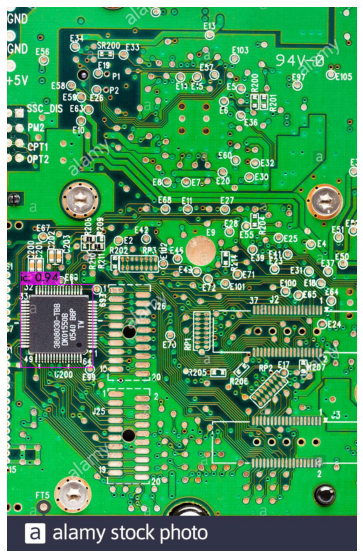

In [71]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights /mydrive/images/test.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

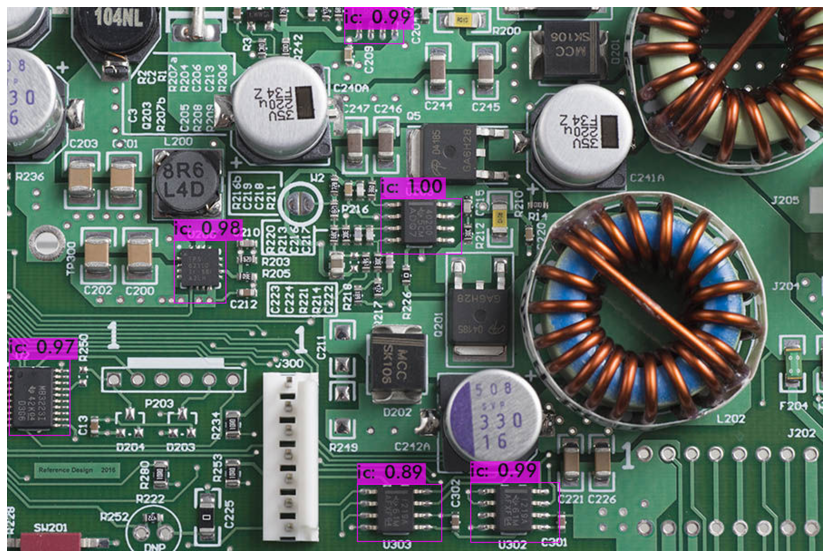

In [72]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights /mydrive/images/test1.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

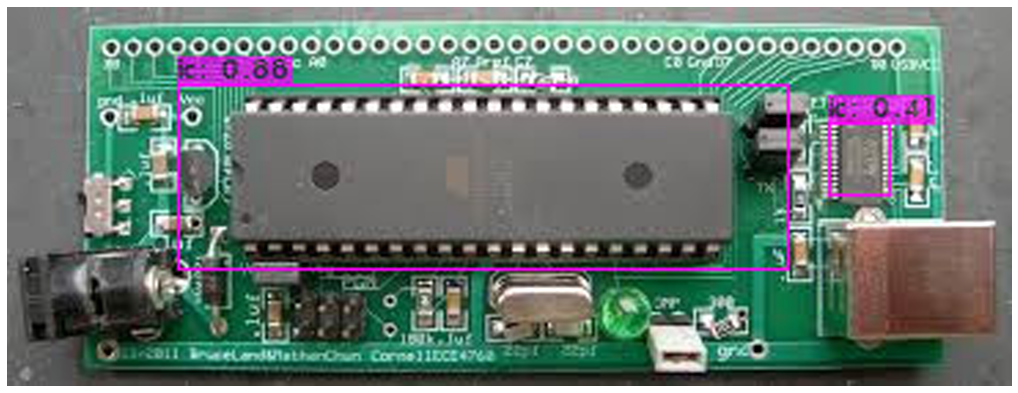

In [75]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights /mydrive/images/test2.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

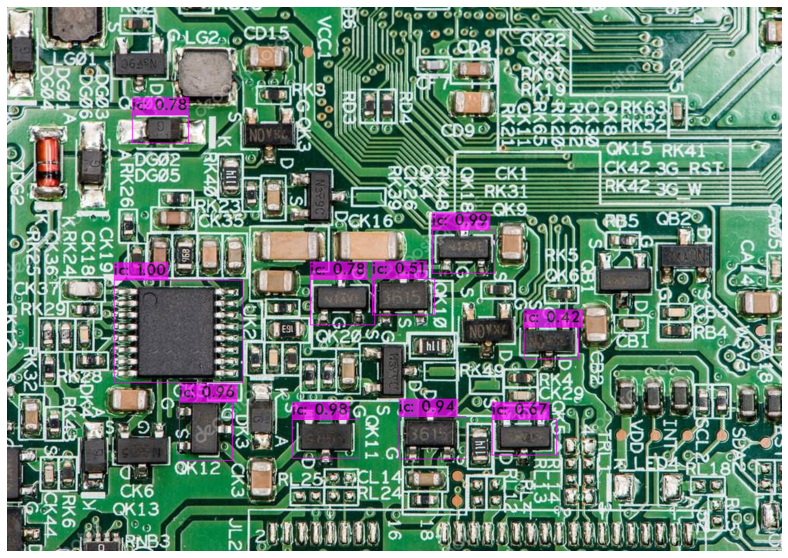

In [77]:
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights /mydrive/images/test3.jpg -thresh 0.3
imShow('predictions.jpg')